In [ ]:
from warnings import filterwarnings
filterwarnings ('ignore')

## Forward feature Selection
Feature - We are going to selc important columns only for a given ML problem
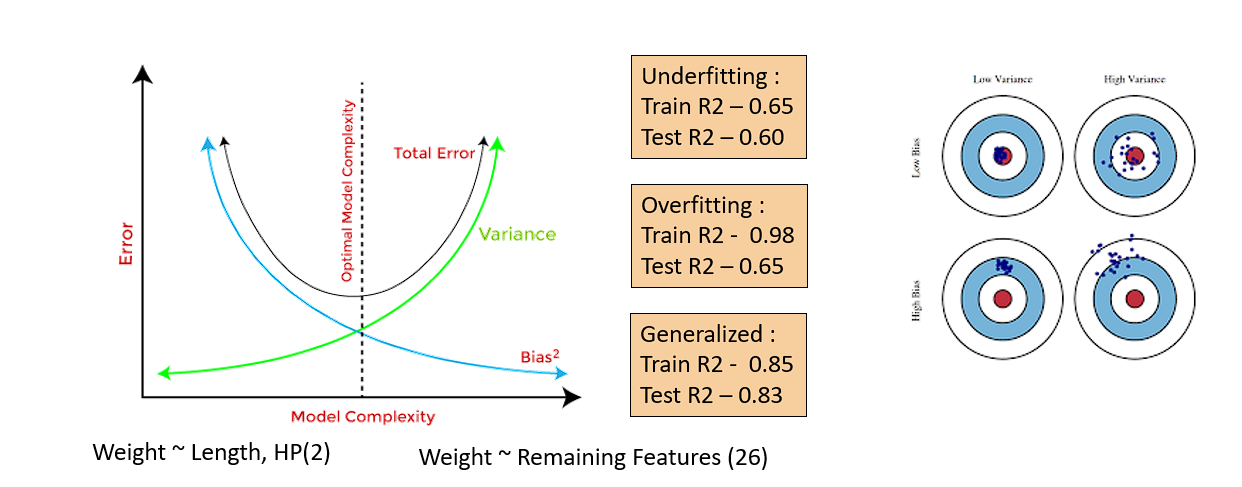

In [2]:
import pandas as pd
A = pd.read_csv('Cars93.csv', na_values=['', 'Na'],keep_default_na = False)
A.head()

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30,15,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28,14,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31,17,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27,13,3640,non-USA,BMW 535i


In [3]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  93 non-null     int64  
 1   Manufacturer        93 non-null     object 
 2   Model               93 non-null     object 
 3   Type                93 non-null     object 
 4   Min.Price           93 non-null     float64
 5   Price               93 non-null     float64
 6   Max.Price           93 non-null     float64
 7   MPG.city            93 non-null     int64  
 8   MPG.highway         93 non-null     int64  
 9   AirBags             89 non-null     object 
 10  DriveTrain          93 non-null     object 
 11  Cylinders           93 non-null     object 
 12  EngineSize          93 non-null     float64
 13  Horsepower          93 non-null     int64  
 14  RPM                 93 non-null     int64  
 15  Rev.per.mile        93 non-null     int64  
 16  Man.trans.

In [4]:
m = A.isna().sum()

In [5]:
m

id                    0
Manufacturer          0
Model                 0
Type                  0
Min.Price             0
Price                 0
Max.Price             0
MPG.city              0
MPG.highway           0
AirBags               4
DriveTrain            0
Cylinders             0
EngineSize            0
Horsepower            0
RPM                   0
Rev.per.mile          0
Man.trans.avail       0
Fuel.tank.capacity    0
Passengers            0
Length                0
Wheelbase             0
Width                 0
Turn.circle           0
Rear.seat.room        0
Luggage.room          0
Weight                0
Origin                0
Make                  0
dtype: int64

In [6]:
m[m>0]

AirBags    4
dtype: int64

In [8]:
A.duplicated().sum()

0

In [11]:
A.shape

(93, 28)

In [12]:
A.columns

Index(['id', 'Manufacturer', 'Model', 'Type', 'Min.Price', 'Price',
       'Max.Price', 'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain',
       'Cylinders', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile',
       'Man.trans.avail', 'Fuel.tank.capacity', 'Passengers', 'Length',
       'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room',
       'Weight', 'Origin', 'Make'],
      dtype='object')

In [13]:
X = A.drop(columns = ['id', 'Weight'])
Y = A[['Weight']]

In [14]:
X.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,13.2,5,177,102,68,37,26.5,11,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,18.0,5,195,115,71,38,30,15,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,16.9,5,180,102,67,37,28,14,non-USA,Audi 90
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,Front,...,21.1,6,193,106,70,37,31,17,non-USA,Audi 100
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,21.1,4,186,109,69,39,27,13,non-USA,BMW 535i


In [15]:
Y.head()

,Weight
0,2705
1,3560
2,3375
3,3405
4,3640


# step 4 : Create a Feature selection Pipeline
Cat = aply ordinal encoding


In [16]:
cat = list (X.columns[X.dtypes=='object'])
con = list (X.columns[X.dtypes!='object'])

In [19]:
cat

['Manufacturer',
 'Model',
 'Type',
 'AirBags',
 'DriveTrain',
 'Cylinders',
 'Man.trans.avail',
 'Rear.seat.room',
 'Luggage.room',
 'Origin',
 'Make']

In [20]:
con

['Min.Price',
 'Price',
 'Max.Price',
 'MPG.city',
 'MPG.highway',
 'EngineSize',
 'Horsepower',
 'RPM',
 'Rev.per.mile',
 'Fuel.tank.capacity',
 'Passengers',
 'Length',
 'Wheelbase',
 'Width',
 'Turn.circle']

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [22]:
num_pipe1 = Pipeline(steps=[('impute', SimpleImputer(strategy='mean')),('scaler',StandardScaler())])

In [23]:
cat_pipe1 = Pipeline(steps = [('impute', SimpleImputer(strategy='most_frequent')),('ordinal',OrdinalEncoder())])

In [24]:
pre1 = ColumnTransformer([('num',num_pipe1, con),('cat',cat_pipe1, cat)]).set_output(transform='pandas')

In [25]:
X_pre1=pre1.fit_transform(X)
X_pre1.head()

,num__Min.Price,num__Price,num__Max.Price,num__MPG.city,num__MPG.highway,num__EngineSize,num__Horsepower,num__RPM,num__Rev.per.mile,num__Fuel.tank.capacity,...,cat__Model,cat__Type,cat__AirBags,cat__DriveTrain,cat__Cylinders,cat__Man.trans.avail,cat__Rear.seat.room,cat__Luggage.room,cat__Origin,cat__Make
0,-0.485787,-0.375720,-0.282465,0.471312,0.360925,-0.841022,-0.073484,1.717489,1.129530,-1.062184,...,48.0,3.0,2.0,1.0,1.0,1.0,9.0,1.0,1.0,0.0
1,1.388017,1.497844,1.531409,-0.781032,-0.770514,0.515869,1.078322,0.369586,0.005661,0.409445,...,55.0,2.0,0.0,1.0,3.0,1.0,16.0,5.0,1.0,1.0
2,1.008658,0.998227,0.948052,-0.423219,-0.581941,0.128186,0.540813,0.369586,-0.105713,0.072197,...,8.0,0.0,1.0,1.0,3.0,1.0,12.0,4.0,1.0,3.0
3,1.571949,1.893374,2.069191,-0.602126,-0.581941,0.128186,0.540813,0.369586,0.410659,1.359872,...,0.0,2.0,1.0,1.0,3.0,1.0,18.0,7.0,1.0,2.0
4,0.755752,1.091905,1.303535,-0.065407,0.172352,0.806631,1.231897,0.706562,0.430909,1.359872,...,5.0,2.0,1.0,2.0,1.0,1.0,10.0,3.0,1.0,4.0


In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector

In [100]:
lr = LinearRegression()
sel = SequentialFeatureSelector (estimator=Ir, 
                                 n_features_to_select=10, 
                                 direction= 'forward')
sel.fit_transform(X_pre1, Y)
imp_cols = sel.get_feature_names_out()
imp_cols

array(['num__MPG.highway', 'num__Horsepower', 'num__RPM',
       'num__Fuel.tank.capacity', 'num__Passengers', 'num__Wheelbase',
       'num__Width', 'cat__Manufacturer', 'cat__Rear.seat.room',
       'cat__Origin'], dtype=object)

In [101]:
len(imp_cols)

10

In [102]:
imp_cols


array(['num__MPG.highway', 'num__Horsepower', 'num__RPM',
       'num__Fuel.tank.capacity', 'num__Passengers', 'num__Wheelbase',
       'num__Width', 'cat__Manufacturer', 'cat__Rear.seat.room',
       'cat__Origin'], dtype=object)

In [103]:
imp_cols[1]

'num__Horsepower'

In [104]:
imp_cols[0].split('__')

['num', 'MPG.highway']

In [105]:
imp_cols[0].split('__')[1]

'MPG.highway'

In [110]:
sel_cols = []
for i in imp_cols:
    s = i.split('__')[1]
    sel_cols.append(s)

In [111]:
sel_cols

['MPG.highway',
 'Horsepower',
 'RPM',
 'Fuel.tank.capacity',
 'Passengers',
 'Wheelbase',
 'Width',
 'Manufacturer',
 'Rear.seat.room',
 'Origin']

In [112]:
X_sel = X[sel_cols]
X_sel.head()

,MPG.highway,Horsepower,RPM,Fuel.tank.capacity,Passengers,Wheelbase,Width,Manufacturer,Rear.seat.room,Origin
0,31,140,6300,13.2,5,102,68,Acura,26.5,non-USA
1,25,200,5500,18.0,5,115,71,Acura,30,non-USA
2,26,172,5500,16.9,5,102,67,Audi,28,non-USA
3,26,172,5500,21.1,6,106,70,Audi,31,non-USA
4,30,208,5700,21.1,4,109,69,BMW,27,non-USA


In [113]:
X_sel.shape

(93, 10)

## Feature Selection is completed

## Step 5: Create a final pipeline with one hot encoder

In [114]:
cat_sel = list(X_sel.columns[X_sel.dtypes=='object'])
con_sel = list(X_sel.columns[X_sel.dtypes!='object'])

In [115]:
cat_sel

['Manufacturer', 'Rear.seat.room', 'Origin']

In [116]:
con_sel

['MPG.highway',
 'Horsepower',
 'RPM',
 'Fuel.tank.capacity',
 'Passengers',
 'Wheelbase',
 'Width']

In [117]:
from sklearn.preprocessing import OneHotEncoder

In [118]:
num_pipe2 = Pipeline(steps = [('impute',SimpleImputer(strategy='mean')),('scaler',StandardScaler())])

In [119]:
cat_pipe2 = Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),('ohe',OneHotEncoder(handle_unknown='ignore',sparse_output = False))])

In [121]:
pre2= ColumnTransformer([('num', num_pipe2, con_sel), ('cat', cat_pipe2, cat_sel)]).set_output(transform = 'pandas')

In [123]:
X_sel_pre = pre2.fit_transform(X_sel) 
X_sel_pre.head()

,num__MPG.highway,num__Horsepower,num__RPM,num__Fuel.tank.capacity,num__Passengers,num__Wheelbase,num__Width,cat__Manufacturer_Acura,cat__Manufacturer_Audi,cat__Manufacturer_BMW,...,cat__Rear.seat.room_30.5,cat__Rear.seat.room_31,cat__Rear.seat.room_31.5,cat__Rear.seat.room_33.5,cat__Rear.seat.room_34,cat__Rear.seat.room_35,cat__Rear.seat.room_36,cat__Rear.seat.room_NA,cat__Origin_USA,cat__Origin_non-USA
0,0.360925,-0.073484,1.717489,-1.062184,-0.083243,-0.286932,-0.366184,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.770514,1.078322,0.369586,0.409445,-0.083243,1.629649,0.431983,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.581941,0.540813,0.369586,0.072197,-0.083243,-0.286932,-0.632239,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.581941,0.540813,0.369586,1.359872,0.884457,0.302785,0.165927,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.172352,1.231897,0.706562,1.359872,-1.050944,0.745073,-0.100128,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Step 6 : Apply Train test split

In [124]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X_sel_pre, Y, test_size=0.2,
                                                random_state=21)

In [125]:
Xtrain.head()

,num__MPG.highway,num__Horsepower,num__RPM,num__Fuel.tank.capacity,num__Passengers,num__Wheelbase,num__Width,cat__Manufacturer_Acura,cat__Manufacturer_Audi,cat__Manufacturer_BMW,...,cat__Rear.seat.room_30.5,cat__Rear.seat.room_31,cat__Rear.seat.room_31.5,cat__Rear.seat.room_33.5,cat__Rear.seat.room_34,cat__Rear.seat.room_35,cat__Rear.seat.room_36,cat__Rear.seat.room_NA,cat__Origin_USA,cat__Origin_non-USA
57,-0.016221,-0.265452,-0.304365,-0.663618,-0.083243,0.155356,-0.632239,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
31,0.172352,-0.323043,2.054464,-1.062184,-0.083243,-0.876650,-0.632239,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
62,-0.959087,1.116716,1.212025,0.716035,-0.083243,0.450214,0.165927,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
29,-0.204794,1.347077,0.875050,0.409445,0.884457,1.334791,1.230149,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
51,-0.581941,1.270290,-1.146804,1.022624,0.884457,1.924508,2.028316,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [126]:
Ytrain.head()

,Weight
57,2920
31,2530
62,3730
29,3490
51,4055


In [127]:
Xtest.head()

,num__MPG.highway,num__Horsepower,num__RPM,num__Fuel.tank.capacity,num__Passengers,num__Wheelbase,num__Width,cat__Manufacturer_Acura,cat__Manufacturer_Audi,cat__Manufacturer_BMW,...,cat__Rear.seat.room_30.5,cat__Rear.seat.room_31,cat__Rear.seat.room_31.5,cat__Rear.seat.room_33.5,cat__Rear.seat.room_34,cat__Rear.seat.room_35,cat__Rear.seat.room_36,cat__Rear.seat.room_NA,cat__Origin_USA,cat__Origin_non-USA
23,-0.016221,-0.975733,-0.809828,-0.816912,-0.083243,-1.024079,-0.632239,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
86,-1.336233,-0.111878,-0.472853,0.961306,1.852158,1.334791,0.431983,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
91,-0.204794,-0.572601,0.201098,-0.265051,-0.083243,0.007926,-0.632239,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
21,-0.581941,0.060893,-0.809828,-0.203734,0.884457,0.892502,-0.100128,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
17,-0.581941,0.502419,-1.820755,1.942392,0.884457,1.777079,2.028316,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [76]:
Ytest.head()

,Weight
23,2670
86,3785
91,2985
21,3570
17,3910


In [128]:
Xtrain.shape

(74, 66)

In [129]:
Xtest.shape

(19, 66)

## Step 7: Bluid and evaluate the model


In [130]:
model = LinearRegression()
model.fit(Xtrain, Ytrain)

LinearRegression()

## Step 8 - Evaluate the model

In [131]:
model.score(Xtrain,Ytrain )

0.9787554857932191

In [132]:
model.score(Xtest, Ytest)

-6.621480674142473e+23

In [133]:
Ypred_train = model.predict(Xtrain)
Ypred_test = model.predict(Xtest)

In [134]:
Ytrain.head()

,Weight
57,2920
31,2530
62,3730
29,3490
51,4055


In [135]:
Ypred_train[0:5]

array([[2852.],
       [2436.],
       [3662.],
       [3510.],
       [3988.]])

In [87]:
Ytest.head()

,Weight
23,2670
86,3785
91,2985
21,3570
17,3910


In [137]:
Ypred_test[0:5]

array([[2.72800000e+03],
       [1.24259574e+15],
       [3.03200000e+03],
       [3.54960830e+14],
       [4.19400000e+03]])

In [138]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,\
mean_absolute_percentage_error, r2_score

In [139]:
def evaluate_model(model, X, Y):
    Ypred = model.predict(X)
    mse = mean_squared_error(Y, Ypred)
    rmse = mse**(1/2)
    mae = mean_absolute_error(Y, Ypred)
    mape = mean_absolute_percentage_error(Y, Ypred)
    r2 = r2_score(Y, Ypred)
    # print all the results
    print(f'Mean Squared erroe: {mse:.2f}')
    print(f'Root mean squared error: {rmse:.2f}')
    print(f'Mean absolute error: {mae:.2f}')
    print(f'Meam Absolute Percentage error: {mape:.4f}')
    print(f'R2 Score: {r2:.4f}')

In [140]:
evaluate_model(model, Xtrain, Ytrain)

Mean Squared erroe: 7146.04
Root mean squared error: 84.53
Mean absolute error: 70.28
Meam Absolute Percentage error: 0.0239
R2 Score: 0.9788


In [93]:
evaluate_model(model, Xtest, Ytest)

Mean Squared erroe: 14885574142676407390687432015872.00
Root mean squared error: 3858182751332083.50
Mean absolute error: 1225905034366974.00
Meam Absolute Percentage error: 391887412422.2869
R2 Score: -41041354285730958975959040.0000


##  Perform out of sample predictions

In [141]:
Xnew = pd.read_csv('sample.csv', na_values=['','NA'], keep_default_na=False)
Xnew

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Origin,Make
0,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,Front,...,15.0,6,190,106,65,37,31.0,17.0,non-USA,Audi 100
1,Pontiac,Sunbird,Compact,9.4,11.1,12.8,23,31,None,Front,...,15.2,5,181,101,66,39,25.0,13.0,USA,Pontiac Sunbird
2,Chevrolet,Lumina,Midsize,13.4,15.9,18.4,21,29,None,Front,...,16.5,6,198,108,71,40,28.5,16.0,USA,Chevrolet Lumina
3,Mazda,RX-7,Sporty,32.5,32.5,32.5,17,25,Driver only,Rear,...,20.0,2,169,96,69,37,NaN,NaN,non-USA,Mazda RX-7
4,Volkswagen,Fox,Small,8.7,9.1,9.5,25,33,None,Front,...,12.4,4,163,93,63,34,26.0,10.0,non-USA,Volkswagen Fox


In [142]:
pre2

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['MPG.highway', 'Horsepower', 'RPM',
                                  'Fuel.tank.capacity', 'Passengers',
                                  'Wheelbase', 'Width']),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Manufacturer', 'Rear.seat.room', 'Origin'])])

In [143]:
Xnew_pre =pre2.transform(Xnew)
Xnew_pre

,num__MPG.highway,num__Horsepower,num__RPM,num__Fuel.tank.capacity,num__Passengers,num__Wheelbase,num__Width,cat__Manufacturer_Acura,cat__Manufacturer_Audi,cat__Manufacturer_BMW,...,cat__Rear.seat.room_30.5,cat__Rear.seat.room_31,cat__Rear.seat.room_31.5,cat__Rear.seat.room_33.5,cat__Rear.seat.room_34,cat__Rear.seat.room_35,cat__Rear.seat.room_36,cat__Rear.seat.room_NA,cat__Origin_USA,cat__Origin_non-USA
0,-0.581941,0.540813,0.369586,-0.510323,0.884457,0.302785,-1.164350,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.360925,-0.649388,-0.135877,-0.449005,-0.083243,-0.434362,-0.898295,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.016221,-0.649388,-0.135877,-0.050439,0.884457,0.597644,0.431983,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.770514,2.134145,2.054464,1.022624,-2.986345,-1.171509,-0.100128,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.738071,-1.206095,0.369586,-1.307455,-1.050944,-1.613797,-1.696461,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [144]:
preds = model.predict(Xnew_pre)
preds

array([[3.5496083e+14],
       [3.5496083e+14],
       [3.5496083e+14],
       [3.1940000e+03],
       [3.5496083e+14]])

In [146]:
A_final = Xnew[['Manufacturer', 'Model']]
A_final

,Manufacturer,Model
0,Audi,100
1,Pontiac,Sunbird
2,Chevrolet,Lumina
3,Mazda,RX-7
4,Volkswagen,Fox


In [147]:
A_final['Weight_pred'] = preds

C:\Users\Payal\AppData\Local\Temp\ipykernel_15452\135559835.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  A_final['Weight_pred'] = preds


In [148]:
A_final

,Manufacturer,Model,Weight_pred
0,Audi,100,3.549608e+14
1,Pontiac,Sunbird,3.549608e+14
2,Chevrolet,Lumina,3.549608e+14
3,Mazda,RX-7,3.194000e+03
4,Volkswagen,Fox,3.549608e+14


In [150]:
A_final.to_csv('forwardselection.csv', index=False)